In [1]:
from whatever import *; from builtins import *; from operator import *; from fz import _1
from bokeh import charts
charts.output_notebook()
%matplotlib inline
from jinja2 import Template; magical('md', lambda x: Template(x).render(**globals()), lang='md', display='Markdown')

Loading BokehJS ...

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd; read_csv = memoize(pd.read_csv); import requests; get_ = memoize(requests.get)

In [5]:
%%md 
## Metadata 'bout the data.
{{_X(about)[get_][this().text.f][__builtin__.str.splitlines].map('> '.__add__)['\n'.join].f()}}

## Metadata 'bout the data.
> # 2016 Jupyter Education Survey
> 
> [![DOI](https://zenodo.org/badge/doi/10.5281/zenodo.51701.svg)](http://dx.doi.org/10.5281/zenodo.51701)
> 
> This dataset is the responses for the Jupyter education survey conducted in May
> 2016. This includes the following files:
> 
> * [questions.pdf](questions.pdf) A PDF containing the questions that were asked.
> * [responses.csv](responses.csv) A CSV file containing the survey responses.
> 
> This survey was designed by Jessica Hamrick (@jhamrick) and was sourced
> primarily from the Jupyter, Jupyter Education, and Software Carpentry email
> lists between 04/22/2016 and 05/07/2016.
> 
> Please cite as:
> 
> ```
> @misc{Hamrick2016,
>   author       = {Hamrick, Jessica B. and Jupyter Development Team},
>   title        = {2016 Jupyter Education Survey},
>   month        = may,
>   year         = 2016,
>   doi          = {10.5281/zenodo.51701},
>   url          = {https://github.com/jupyter/datasets/tree/master/surveys/2016-05-education-survey}
> }
> ```

In [6]:
about = "https://raw.githubusercontent.com/jupyter/surveys/7e0070cb41ab74f76aa746d63cf8034686a1f761/surveys/2016-05-education-survey/README.md"
doi = "https://zenodo.org/record/51701/files/responses.csv"
df = _X(doi) > read_csv; df = df.set_index('Timestamp'); df.index = pd.to_datetime(df.index)

In [7]:
%%md 

# data 'bout the data

* There are at most `{{second(df.shape)}}` ~~columns~~ __questions__ answered.
* {{_X(df.columns).filter(_X()[flip(contains)]('?').f).list.len.f()}} were answers to requestions.
* The other fields included:
    {% for r in _X(df.columns).filter(_X()[complement(flip(contains))]('?').f).list.f() %}
    > _{{r}}_
    > 
    {% endfor %}
* `{{first(df.shape)}}` responses were recieved.


# data 'bout the data

* There are at most `24` ~~columns~~ __questions__ answered.
* 21 were answers to requestions.
* The other fields included:
    
    > _If there an official course webpage, please list it here:_
    > 
    
    > _If your course materials are publicly available online, please include the URL:_
    > 
    
    > _Please indicate which of the following Jupyter/IPython tools your class is utilizing:_
    > 
    
* `125` responses were recieved.

In [8]:
jipy_tools = (_X(df['Please indicate which of the following Jupyter/IPython tools your class is utilizing:']).list
 * (lambda s: s.split(', ')) * (lambda x: {k: 1 for k in x}) | list | pd.DataFrame | this().set_index(df.index).fillna(0).f
); jipydf = jipy_tools.f()

In [9]:
%%md 

* There are `{{second(jipydf.shape)}}` Jupyter/IPython tools:
 > {{(100*jipydf.sum().sort_values(ascending=False)/len(df)).to_frame('﹪ of responses').transpose().to_html()}}
* Correlation between the tools used:
 > {{jipydf.corr().to_html()}}
* Project Jupyter is favored heavily for entry-level classes.
 > {{(100*df['What is the minimum level of programming experience that your students are expected to be at?'].value_counts()/len(df)).to_frame('％ of responses').to_html()}}


* There are `7` Jupyter/IPython tools:
 > <table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Jupyter notebook</th>
      <th>nbconvert</th>
      <th>JupyterHub</th>
      <th>Interactive widgets</th>
      <th>IPython terminal</th>
      <th>nbgrader</th>
      <th>IPython parallel</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>﹪ of responses</th>
      <td>98.4</td>
      <td>25.6</td>
      <td>20.8</td>
      <td>20.0</td>
      <td>19.2</td>
      <td>10.4</td>
      <td>1.6</td>
    </tr>
  </tbody>
</table>
* Correlation between the tools used:
 > <table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>IPython parallel</th>
      <th>IPython terminal</th>
      <th>Interactive widgets</th>
      <th>Jupyter notebook</th>
      <th>JupyterHub</th>
      <th>nbconvert</th>
      <th>nbgrader</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>IPython parallel</th>
      <td>1.000000</td>
      <td>0.099714</td>
      <td>-0.063758</td>
      <td>0.016260</td>
      <td>-0.065348</td>
      <td>0.217385</td>
      <td>-0.043444</td>
    </tr>
    <tr>
      <th>IPython terminal</th>
      <td>0.099714</td>
      <td>1.000000</td>
      <td>-0.040622</td>
      <td>-0.261588</td>
      <td>-0.049642</td>
      <td>0.179459</td>
      <td>0.033535</td>
    </tr>
    <tr>
      <th>Interactive widgets</th>
      <td>-0.063758</td>
      <td>-0.040622</td>
      <td>1.000000</td>
      <td>0.063758</td>
      <td>0.088697</td>
      <td>0.027496</td>
      <td>0.222761</td>
    </tr>
    <tr>
      <th>Jupyter notebook</th>
      <td>0.016260</td>
      <td>-0.261588</td>
      <td>0.063758</td>
      <td>1.000000</td>
      <td>0.065348</td>
      <td>0.074799</td>
      <td>0.043444</td>
    </tr>
    <tr>
      <th>JupyterHub</th>
      <td>-0.065348</td>
      <td>-0.049642</td>
      <td>0.088697</td>
      <td>0.065348</td>
      <td>1.000000</td>
      <td>-0.029627</td>
      <td>0.535666</td>
    </tr>
    <tr>
      <th>nbconvert</th>
      <td>0.217385</td>
      <td>0.179459</td>
      <td>0.027496</td>
      <td>0.074799</td>
      <td>-0.029627</td>
      <td>1.000000</td>
      <td>0.040354</td>
    </tr>
    <tr>
      <th>nbgrader</th>
      <td>-0.043444</td>
      <td>0.033535</td>
      <td>0.222761</td>
      <td>0.043444</td>
      <td>0.535666</td>
      <td>0.040354</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
* Project Jupyter is favored heavily for entry-level classes.
 > <table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>％ of responses</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Complete novice (no experience)</th>
      <td>42.4</td>
    </tr>
    <tr>
      <th>Novice (~1 semester of experience)</th>
      <td>28.8</td>
    </tr>
    <tr>
      <th>Intermediate (a year of experience)</th>
      <td>24.0</td>
    </tr>
    <tr>
      <th>Advanced (2-3 years of experience)</th>
      <td>4.8</td>
    </tr>
  </tbody>
</table>

In [10]:
@curry
def replace_strs(args, s):
    for arg in args: s = s.lower().replace(arg[0], arg[1])
    return s

In [11]:
class_sizes = pd.Series([1]*len(df), 
          index=_X(df['Approximately how many students are in your class?'].tolist()).zip(jipydf.index) | list > pd.MultiIndex.from_tuples
         ).unstack(1).fillna(0)
class_sizes.columns = _X(class_sizes.columns) * replace_strs([('100', "💯"), ('500', "💯𝑥⓹")]) > list

* The tools are used by small, medium, and large classrooms.

In [12]:
class_sizes.sum().sort_values(ascending=False).to_frame('count').transpose()

,10 - 25,25 - 50,50 - 💯,less than 10,250 - 💯𝑥⓹,more than 💯𝑥⓹,💯 - 250
count,50.0,35.0,13.0,9.0,7.0,6.0,5.0


In [13]:
%%md

* Counts of `classroom sizes` using each tool.

{{(pd.DataFrame(class_sizes.transpose().values.__matmul__(jipydf.values), index=class_sizes.columns, columns=jipydf.columns)).transpose().astype(int).to_html()}}


* Counts of `classroom sizes` using each tool.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>10 - 25</th>
      <th>💯 - 250</th>
      <th>25 - 50</th>
      <th>250 - 💯𝑥⓹</th>
      <th>50 - 💯</th>
      <th>less than 10</th>
      <th>more than 💯𝑥⓹</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>IPython parallel</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>IPython terminal</th>
      <td>11</td>
      <td>0</td>
      <td>5</td>
      <td>0</td>
      <td>5</td>
      <td>3</td>
      <td>0</td>
    </tr>
    <tr>
      <th>Interactive widgets</th>
      <td>10</td>
      <td>1</td>
      <td>6</td>
      <td>1</td>
      <td>5</td>
      <td>2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>Jupyter notebook</th>
      <td>49</td>
      <td>5</td>
      <td>34</td>
      <td>7</td>
      <td>13</td>
      <td>9</td>
      <td>6</td>
    </tr>
    <tr>
      <th>JupyterHub</th>
      <td>4</td>
      <td>2</td>
      <td>7</td>
      <td>2</td>
      <td>5</td>
      <td>5</td>
      <td>1</td>
    </tr>
    <tr>
      <th>nbconvert</th>
      <td>15</td>
      <td>2</td>
      <td>4</td>
      <td>3</td>
      <td>5</td>
      <td>3</td>
      <td>0</td>
    </tr>
    <tr>
      <th>nbgrader</th>
      <td>2</td>
      <td>1</td>
      <td>5</td>
      <td>1</td>
      <td>3</td>
      <td>0</td>
      <td>1</td>
    </tr>
  </tbody>
</table>

In [14]:
class_levels = _X(df['What level of education is your course?'].apply(lambda s: s.replace(
        'Mixed (conferences, workshops, Software Carpentry style events, etc.)', 'Mixed',
    )).apply(lambda s: s.split(', ')).tolist()).map(lambda x: {k: 1 for k in x}).list[
    pd.DataFrame](index=df.index)[this().fillna(0).f].f()

In [15]:
%%md 
* A look at the classroom levels that Jupyter is used in.
> {{class_levels.sum().to_frame('👻👹👾').sort_values('👻👹👾', ascending=False).transpose().to_html()}}

* A look at the classroom levels that Jupyter is used in.
> <table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Advanced undergraduate (juniors and seniors)</th>
      <th>Graduate</th>
      <th>Intermediate undergraduate (sophmores and juniors)</th>
      <th>Introductory undergraduate (freshman and sophmores)</th>
      <th>Mixed</th>
      <th>MOOC</th>
      <th>High school (ages 14-18)</th>
      <th>Colleagues</th>
      <th>Community college</th>
      <th>Corporate Training</th>
      <th>Course for Master students and PhD students</th>
      <th>PhD</th>
      <th>PhD level</th>
      <th>Postdoc</th>
      <th>Postgraduate</th>
      <th>senior researchers</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>👻👹👾</th>
      <td>52.0</td>
      <td>37.0</td>
      <td>31.0</td>
      <td>22.0</td>
      <td>14.0</td>
      <td>4.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>

In [16]:
subjects = (_X(df['What field(s) is your course most related to?'].tolist())
 * (lambda s: s.split(', ')) * (lambda x: {k: 1 for k in x}) | list
)[pd.DataFrame](index=df.index)[this().fillna(0).f] > identity

subjects.columns = (_X(subjects.columns) * replace_strs([(' engineering', "🚂🏢✈️"), (' science', "🔭💊🔬"), ('space', "👽")])
 > list)

In [17]:
%%md

Project Jupyter appears is used in `{{second(subjects.shape)}}` different subjects

> {{subjects.sum().sort_values(ascending=False).to_frame('subjects').transpose().to_html()}}


Project Jupyter appears is used in `37` different subjects

> <table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>computer🔭💊🔬</th>
      <th>data🔭💊🔬</th>
      <th>physics</th>
      <th>biology</th>
      <th>mathematics</th>
      <th>statistics</th>
      <th>machine learning</th>
      <th>electrical🚂🏢✈️</th>
      <th>earth🔭💊🔬</th>
      <th>chemistry</th>
      <th>mechanical🚂🏢✈️</th>
      <th>planetary/👽🔭💊🔬</th>
      <th>psychology</th>
      <th>economics</th>
      <th>literature</th>
      <th>sociology</th>
      <th>history</th>
      <th>geography</th>
      <th>environmental🔭💊🔬</th>
      <th>chemical and biological🚂🏢✈️</th>
      <th>civil🚂🏢✈️</th>
      <th>chemical🚂🏢✈️</th>
      <th>arts</th>
      <th>astrophysics</th>
      <th>library🔭💊🔬</th>
      <th>finance</th>
      <th>general elementary data &amp; programming skills</th>
      <th>journalism</th>
      <th>telecommunication</th>
      <th>linguistics</th>
      <th>materials🚂🏢✈️</th>
      <th>medicine</th>
      <th>political🔭💊🔬</th>
      <th>robotics</th>
      <th>signal processing</th>
      <th>software🚂🏢✈️</th>
      <th>artificial intelligence</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>subjects</th>
      <td>49.0</td>
      <td>32.0</td>
      <td>31.0</td>
      <td>22.0</td>
      <td>19.0</td>
      <td>17.0</td>
      <td>13.0</td>
      <td>9.0</td>
      <td>9.0</td>
      <td>7.0</td>
      <td>6.0</td>
      <td>6.0</td>
      <td>5.0</td>
      <td>4.0</td>
      <td>3.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>

In [18]:
charts.show(subjects.sum().sort_values(ascending=False).to_frame('subjects').pipe(charts.Bar, label='index', values='subjects', legend=None, plot_height=350, plot_width=800));

In [19]:
stackcorr = subjects.corr().stack()
related_topics  = stackcorr[pd.np.logical_and(stackcorr < 1, stackcorr>.2 )].sort_values(ascending=False).to_frame('strength').drop_duplicates()

In [20]:
%%md
> {{related_topics.transpose().to_html()}}

> <table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>literature</th>
      <th>library🔭💊🔬</th>
      <th>journalism</th>
      <th>arts</th>
      <th colspan="2" halign="left">literature</th>
      <th>finance</th>
      <th>history</th>
      <th>physics</th>
      <th>astrophysics</th>
      <th>literature</th>
      <th>physics</th>
      <th>chemical🚂🏢✈️</th>
      <th>sociology</th>
      <th>astrophysics</th>
      <th>electrical🚂🏢✈️</th>
      <th>literature</th>
      <th>mathematics</th>
      <th>biology</th>
      <th colspan="2" halign="left">statistics</th>
      <th>mechanical🚂🏢✈️</th>
      <th>electrical🚂🏢✈️</th>
      <th>machine learning</th>
      <th>mathematics</th>
      <th>data🔭💊🔬</th>
      <th>mathematics</th>
      <th>finance</th>
      <th>computer🔭💊🔬</th>
      <th>chemistry</th>
    </tr>
    <tr>
      <th></th>
      <th>history</th>
      <th>history</th>
      <th>history</th>
      <th>sociology</th>
      <th>arts</th>
      <th>library🔭💊🔬</th>
      <th>economics</th>
      <th>sociology</th>
      <th>chemistry</th>
      <th>planetary/👽🔭💊🔬</th>
      <th>sociology</th>
      <th>planetary/👽🔭💊🔬</th>
      <th>chemistry</th>
      <th>economics</th>
      <th>earth🔭💊🔬</th>
      <th>signal processing</th>
      <th>data🔭💊🔬</th>
      <th>computer🔭💊🔬</th>
      <th>chemistry</th>
      <th>data🔭💊🔬</th>
      <th>machine learning</th>
      <th>electrical🚂🏢✈️</th>
      <th>mathematics</th>
      <th>data🔭💊🔬</th>
      <th>mechanical🚂🏢✈️</th>
      <th>history</th>
      <th>artificial intelligence</th>
      <th>mathematics</th>
      <th>data🔭💊🔬</th>
      <th>earth🔭💊🔬</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>strength</th>
      <td>0.813171</td>
      <td>0.70425</td>
      <td>0.70425</td>
      <td>0.70425</td>
      <td>0.572675</td>
      <td>0.572675</td>
      <td>0.493915</td>
      <td>0.49187</td>
      <td>0.424122</td>
      <td>0.399933</td>
      <td>0.396587</td>
      <td>0.391008</td>
      <td>0.368707</td>
      <td>0.339075</td>
      <td>0.322401</td>
      <td>0.322401</td>
      <td>0.26733</td>
      <td>0.253411</td>
      <td>0.252904</td>
      <td>0.248555</td>
      <td>0.247095</td>
      <td>0.227016</td>
      <td>0.22689</td>
      <td>0.220504</td>
      <td>0.217652</td>
      <td>0.217385</td>
      <td>0.212112</td>
      <td>0.212112</td>
      <td>0.204863</td>
      <td>0.201373</td>
    </tr>
  </tbody>
</table>

> Some data driven relationships between subjects.

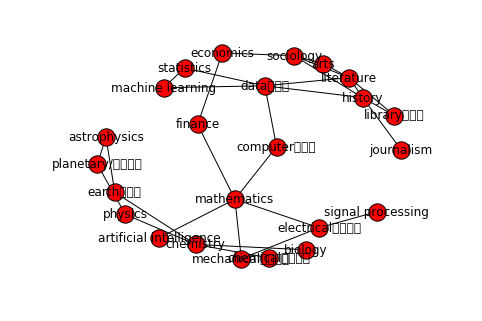

In [21]:
import networkx as nx; G = nx.from_pandas_dataframe(related_topics.reset_index(), 'level_0', 'level_1', 'strength')
pos = nx.layout.spring_layout(G); nx.draw(G,pos); nx.draw_networkx_labels(G, pos);